In [1]:
#Production data URL: https://raw.githubusercontent.com/bettylucy/ML23/main/VolveProdData.csv

import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
welldata=pd.read_csv("https://raw.githubusercontent.com/bettylucy/ML23/main/VolveProdData.csv")

In [3]:
#Reading data file, showing data types and a sample header
welldata.info()
welldata.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15832 entries, 0 to 15831
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   DATEPRD                   15832 non-null  object 
 1   WELL_BORE_CODE            15832 non-null  object 
 2   NPD_WELL_BORE_CODE        15832 non-null  int64  
 3   NPD_WELL_BORE_NAME        15832 non-null  object 
 4   NPD_FIELD_CODE            15832 non-null  int64  
 5   NPD_FIELD_NAME            15832 non-null  object 
 6   NPD_FACILITY_CODE         15832 non-null  int64  
 7   NPD_FACILITY_NAME         15832 non-null  object 
 8   ON_STREAM_HRS             15547 non-null  float64
 9   AVG_DOWNHOLE_PRESSURE     9178 non-null   float64
 10  AVG_DOWNHOLE_TEMPERATURE  8980 non-null   float64
 11  AVG_DP_TUBING             8980 non-null   float64
 12  AVG_ANNULUS_PRESS         7890 non-null   float64
 13  AVG_CHOKE_SIZE_P          8919 non-null   float64
 14  AVG_CH

DATEPRD WELL_BORE_CODE  NPD_WELL_BORE_CODE NPD_WELL_BORE_NAME  \
0  2014-04-07  NO 15/9-F-1 C                7405         15/9-F-1 C   
1  2014-04-08  NO 15/9-F-1 C                7405         15/9-F-1 C   
2  2014-04-09  NO 15/9-F-1 C                7405         15/9-F-1 C   
3  2014-04-10  NO 15/9-F-1 C                7405         15/9-F-1 C   
4  2014-04-11  NO 15/9-F-1 C                7405         15/9-F-1 C   

   NPD_FIELD_CODE NPD_FIELD_NAME  NPD_FACILITY_CODE NPD_FACILITY_NAME  \
0         3420717          VOLVE             369304    MÆRSK INSPIRER   
1         3420717          VOLVE             369304    MÆRSK INSPIRER   
2         3420717          VOLVE             369304    MÆRSK INSPIRER   
3         3420717          VOLVE             369304    MÆRSK INSPIRER   
4         3420717          VOLVE             369304    MÆRSK INSPIRER   

   ON_STREAM_HRS  AVG_DOWNHOLE_PRESSURE  ...  AVG_CHOKE_UOM  AVG_WHP_P  \
0            0.0                   0.00  ...              %        0.0   
1            0.0                    NaN  ...              %        0.0   
2            0.0                    NaN  ...              %        0.0   
3            0.0                    NaN  ...              %        0.0   
4            0.0                 310.38  ...              %       33.1   

   AVG_WHT_P  DP_CHOKE_SIZE BORE_OIL_VOL  BORE_GAS_VOL  BORE_WAT_VOL  \
0       0.00           0.00          0.0           0.0           0.0   
1       0.00           0.00          0.0           0.0           0.0   
2       0.00           0.00          0.0           0.0           0.0   
3       0.00           0.00          0.0           0.0           0.0   
4      10.48          33.07          0.0           0.0           0.0   

   BORE_WI_VOL   FLOW_KIND  WELL_TYPE  
0          NaN  production         OP  
1          NaN  production         OP  
2          NaN  production         OP  
3          NaN  production         OP  
4          NaN  production         OP  

[5 rows x 24 columns]

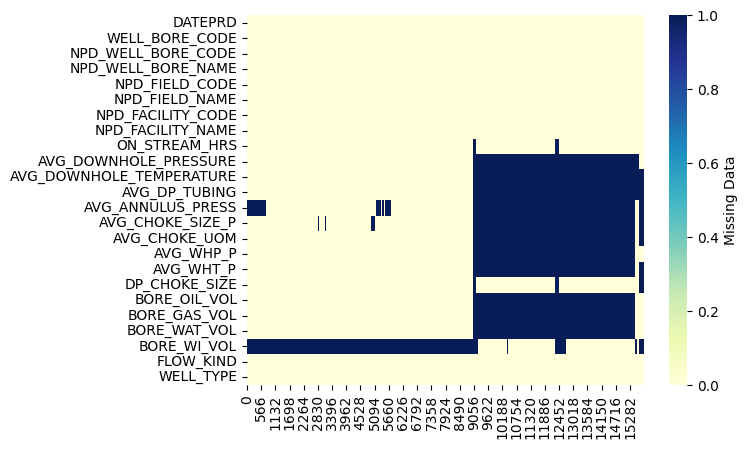

In [4]:
#Missing values 2 (choose this one)
sns.heatmap(welldata.isna().transpose(),
           cmap="YlGnBu",
           cbar_kws={'label':'Missing Data'})
plt.show()

In [5]:
#Size of original dataframe
welldata.shape

(15832, 24)

In [6]:
#Write about ROCCC analysis (YYYNY)

In [7]:
#Distinguish producer from injectors
welldata['WELL_TYPE'].unique()

array(['OP', 'WI'], dtype=object)

In [8]:
#How many wells
welldata['NPD_WELL_BORE_CODE'].unique()

array([7405, 7078, 5599, 5351, 7289, 5693, 5769], dtype=int64)

In [9]:
#Finding production wells
welldata[welldata['WELL_TYPE'] == 'OP']['NPD_WELL_BORE_CODE'].unique()

#Storing production wells
welldataproducers=welldata[welldata['WELL_TYPE'] == 'OP']

In [10]:
welldataproducers.head(5)

DATEPRD WELL_BORE_CODE  NPD_WELL_BORE_CODE NPD_WELL_BORE_NAME  \
0  2014-04-07  NO 15/9-F-1 C                7405         15/9-F-1 C   
1  2014-04-08  NO 15/9-F-1 C                7405         15/9-F-1 C   
2  2014-04-09  NO 15/9-F-1 C                7405         15/9-F-1 C   
3  2014-04-10  NO 15/9-F-1 C                7405         15/9-F-1 C   
4  2014-04-11  NO 15/9-F-1 C                7405         15/9-F-1 C   

   NPD_FIELD_CODE NPD_FIELD_NAME  NPD_FACILITY_CODE NPD_FACILITY_NAME  \
0         3420717          VOLVE             369304    MÆRSK INSPIRER   
1         3420717          VOLVE             369304    MÆRSK INSPIRER   
2         3420717          VOLVE             369304    MÆRSK INSPIRER   
3         3420717          VOLVE             369304    MÆRSK INSPIRER   
4         3420717          VOLVE             369304    MÆRSK INSPIRER   

   ON_STREAM_HRS  AVG_DOWNHOLE_PRESSURE  ...  AVG_CHOKE_UOM  AVG_WHP_P  \
0            0.0                   0.00  ...              %        0.0   
1            0.0                    NaN  ...              %        0.0   
2            0.0                    NaN  ...              %        0.0   
3            0.0                    NaN  ...              %        0.0   
4            0.0                 310.38  ...              %       33.1   

   AVG_WHT_P  DP_CHOKE_SIZE BORE_OIL_VOL  BORE_GAS_VOL  BORE_WAT_VOL  \
0       0.00           0.00          0.0           0.0           0.0   
1       0.00           0.00          0.0           0.0           0.0   
2       0.00           0.00          0.0           0.0           0.0   
3       0.00           0.00          0.0           0.0           0.0   
4      10.48          33.07          0.0           0.0           0.0   

   BORE_WI_VOL   FLOW_KIND  WELL_TYPE  
0          NaN  production         OP  
1          NaN  production         OP  
2          NaN  production         OP  
3          NaN  production         OP  
4          NaN  production         OP  

[5 rows x 24 columns]

In [11]:
#Finding injection wells
welldata[welldata['WELL_TYPE'] == 'WI']['NPD_WELL_BORE_CODE'].unique()

#Storing injection wells
welldatainjection=welldata[welldata['WELL_TYPE'] == 'WI']

In [12]:
welldatainjection.head(5)

DATEPRD  WELL_BORE_CODE  NPD_WELL_BORE_CODE NPD_WELL_BORE_NAME  \
91    2014-07-07   NO 15/9-F-1 C                7405         15/9-F-1 C   
9001  2007-09-01  NO 15/9-F-4 AH                5693           15/9-F-4   
9002  2007-09-02  NO 15/9-F-4 AH                5693           15/9-F-4   
9003  2007-09-03  NO 15/9-F-4 AH                5693           15/9-F-4   
9004  2007-09-04  NO 15/9-F-4 AH                5693           15/9-F-4   

      NPD_FIELD_CODE NPD_FIELD_NAME  NPD_FACILITY_CODE NPD_FACILITY_NAME  \
91           3420717          VOLVE             369304    MÆRSK INSPIRER   
9001         3420717          VOLVE             369304    MÆRSK INSPIRER   
9002         3420717          VOLVE             369304    MÆRSK INSPIRER   
9003         3420717          VOLVE             369304    MÆRSK INSPIRER   
9004         3420717          VOLVE             369304    MÆRSK INSPIRER   

      ON_STREAM_HRS  AVG_DOWNHOLE_PRESSURE  ...  AVG_CHOKE_UOM  AVG_WHP_P  \
91             24.0                 215.07  ...              %      52.66   
9001            NaN                    NaN  ...            NaN        NaN   
9002            NaN                    NaN  ...            NaN        NaN   
9003            NaN                    NaN  ...            NaN        NaN   
9004            NaN                    NaN  ...            NaN        NaN   

      AVG_WHT_P  DP_CHOKE_SIZE BORE_OIL_VOL  BORE_GAS_VOL  BORE_WAT_VOL  \
91        54.97          24.23        522.0      77846.76        154.47   
9001        NaN            NaN          NaN           NaN           NaN   
9002        NaN            NaN          NaN           NaN           NaN   
9003        NaN            NaN          NaN           NaN           NaN   
9004        NaN            NaN          NaN           NaN           NaN   

      BORE_WI_VOL   FLOW_KIND  WELL_TYPE  
91            NaN  production         WI  
9001          NaN   injection         WI  
9002          NaN   injection         WI  
9003          NaN   injection         WI  
9004          NaN   injection         WI  

[5 rows x 24 columns]

In [13]:
#Dropping unnecessary columns
welldataproducers.drop(labels=['WELL_BORE_CODE',
                        'BORE_WI_VOL',
                        'NPD_FIELD_CODE',
                         'NPD_WELL_BORE_NAME',
                         'NPD_FIELD_NAME',
                         'NPD_FACILITY_CODE',
                         'NPD_FACILITY_NAME',
                        'AVG_CHOKE_UOM',
                        'FLOW_KIND',
                        'WELL_TYPE'], axis=1)
welldatainjection.drop(labels=['WELL_BORE_CODE',
                        'BORE_OIL_VOL', 
                        'BORE_GAS_VOL',
                        'BORE_WAT_VOL',
                        'NPD_FIELD_CODE',
                         'NPD_WELL_BORE_NAME',
                         'NPD_FIELD_NAME',
                         'NPD_FACILITY_CODE',
                         'NPD_FACILITY_NAME',
                        'AVG_CHOKE_UOM',
                        'FLOW_KIND',
                        'WELL_TYPE'], axis=1)

DATEPRD  NPD_WELL_BORE_CODE  ON_STREAM_HRS  AVG_DOWNHOLE_PRESSURE  \
91     2014-07-07                7405           24.0                 215.07   
9001   2007-09-01                5693            NaN                    NaN   
9002   2007-09-02                5693            NaN                    NaN   
9003   2007-09-03                5693            NaN                    NaN   
9004   2007-09-04                5693            NaN                    NaN   
...           ...                 ...            ...                    ...   
15624  2016-09-09                5769            0.0                    NaN   
15625  2016-09-10                5769            0.0                    NaN   
15626  2016-09-11                5769            0.0                    NaN   
15627  2016-09-12                5769            0.0                    NaN   
15633  2016-09-18                5769            0.0                    NaN   

       AVG_DOWNHOLE_TEMPERATURE  AVG_DP_TUBING  AVG_ANNULUS_PRESS  \
91                       108.14         162.41                NaN   
9001                        NaN            NaN                NaN   
9002                        NaN            NaN                NaN   
9003                        NaN            NaN                NaN   
9004                        NaN            NaN                NaN   
...                         ...            ...                ...   
15624                       NaN            NaN              0.287   
15625                       NaN            NaN              0.283   
15626                       NaN            NaN              0.287   
15627                       NaN            NaN              0.287   
15633                       NaN            NaN                NaN   

       AVG_CHOKE_SIZE_P  AVG_WHP_P  AVG_WHT_P  DP_CHOKE_SIZE  BORE_WI_VOL  
91                46.82      52.66      54.97          24.23          NaN  
9001                NaN        NaN        NaN            NaN          NaN  
9002                NaN        NaN        NaN            NaN          NaN  
9003                NaN        NaN        NaN            NaN          NaN  
9004                NaN        NaN        NaN            NaN          NaN  
...                 ...        ...        ...            ...          ...  
15624              0.58       0.09       0.23           0.04          0.0  
15625              0.57       0.09       0.23           0.04          0.0  
15626              0.57       0.09       0.23           0.03          0.0  
15627              0.56       0.09       0.23           0.03          0.0  
15633               NaN        NaN        NaN           0.00          0.0  

[6490 rows x 12 columns]

In [14]:
#Oil production for each producer well
welldataproducers.loc[:,"NPD_WELL_BORE_CODE"] = welldataproducers["NPD_WELL_BORE_CODE"].astype(str)
#welldataproducersfig = welldataproducers.sort_values(by="DATEPRD")
fig = px.scatter(welldataproducers, x="DATEPRD", y=["BORE_OIL_VOL"],
                 color="NPD_WELL_BORE_CODE",
                 hover_name="NPD_WELL_BORE_CODE",
                )
fig.show()

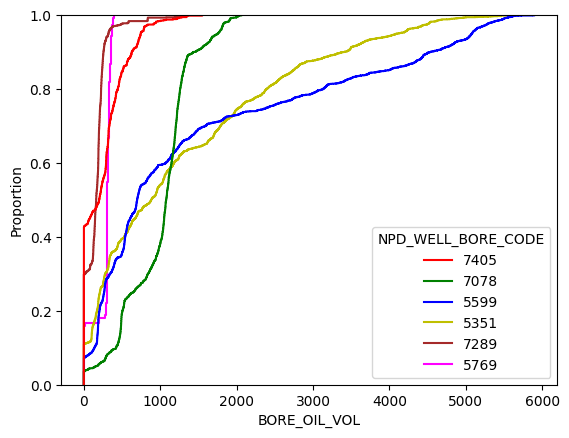

In [15]:
#Proportions plot for production
sns.ecdfplot(x='BORE_OIL_VOL',data=welldataproducers, hue='NPD_WELL_BORE_CODE',palette=['r', 'g', 'b', 'y', 'brown', 'magenta'])

plt.show()

C:\Users\betty\anaconda3\envs\Python10\lib\site-packages\seaborn\axisgrid.py:854: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\betty\anaconda3\envs\Python10\lib\site-packages\seaborn\axisgrid.py:854: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\betty\anaconda3\envs\Python10\lib\site-packages\seaborn\axisgrid.py:854: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\betty\anaconda3\envs\Python10\lib\site-packages\seaborn\axisgrid.py:854: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the 

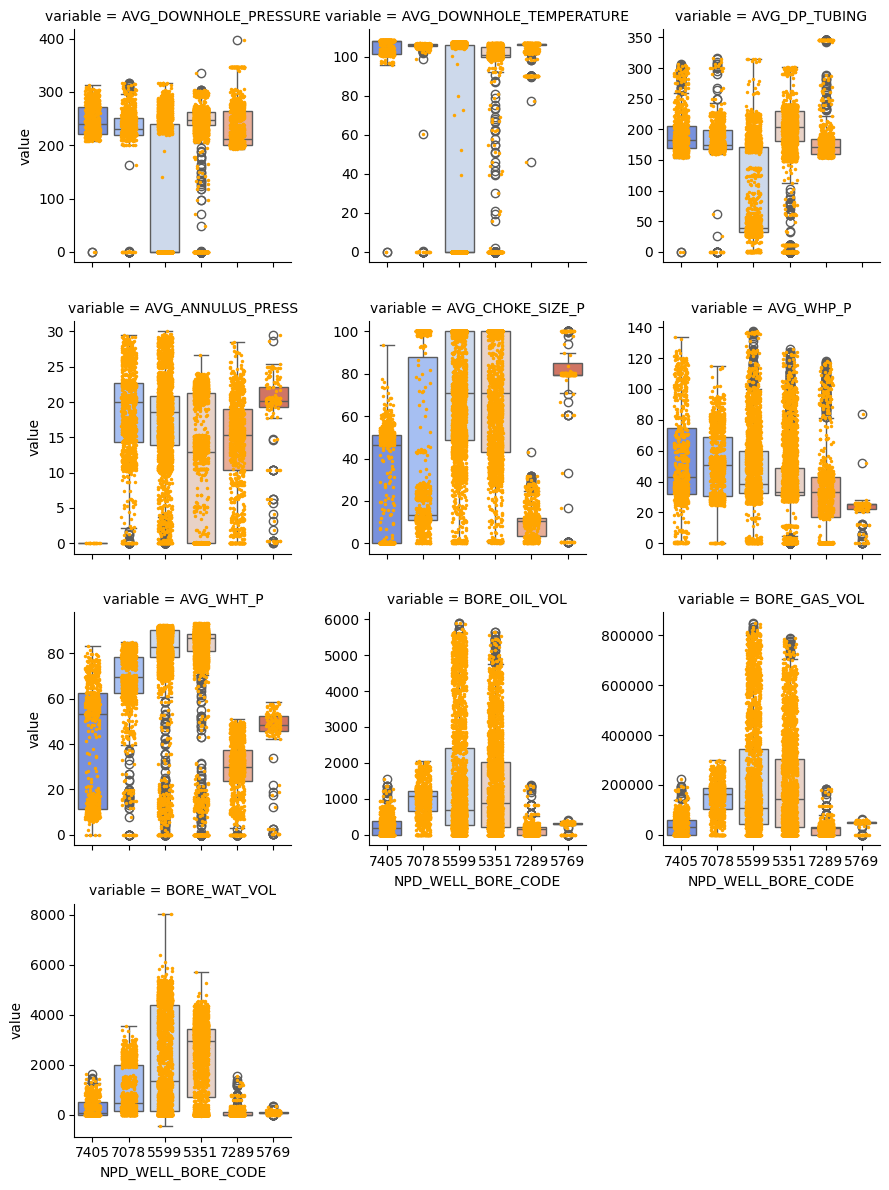

In [16]:
welldatabp = welldataproducers.melt(id_vars=['NPD_WELL_BORE_CODE'])

cols = ['AVG_DOWNHOLE_PRESSURE', 
        'AVG_DOWNHOLE_TEMPERATURE',
        'AVG_DP_TUBING',
        'AVG_ANNULUS_PRESS',
        'AVG_CHOKE_SIZE_P',
        'AVG_WHP_P',
       'AVG_WHT_P',
       'BORE_OIL_VOL',
       'BORE_GAS_VOL',
       'BORE_WAT_VOL']
grid = sns.axisgrid.FacetGrid(welldatabp[welldatabp.variable.isin(cols)], col='variable', sharey=False, col_wrap=3)
grid.map(sns.boxplot, 'NPD_WELL_BORE_CODE','value',order=['7405','7078','5599','5351','7289','5769'], palette='coolwarm')
grid.map(sns.stripplot, 'NPD_WELL_BORE_CODE','value',order=['7405','7078','5599','5351','7289','5769'], color="orange", jitter=0.2, size=2.5)



In [17]:
#Filling NaN or empty data points with forward for each column
welldataproducers.fillna(method='ffill', inplace=True)

welldataproducers.drop(labels=['WELL_BORE_CODE',
                        'BORE_WI_VOL',
                        'NPD_FIELD_CODE',
                         'NPD_WELL_BORE_NAME',
                         'NPD_FIELD_NAME',
                         'NPD_FACILITY_CODE',
                         'NPD_FACILITY_NAME',
                        'AVG_CHOKE_UOM',
                        'FLOW_KIND',
                        'WELL_TYPE'], axis=1)


C:\Users\betty\AppData\Local\Temp\ipykernel_7460\3080335859.py:2: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

C:\Users\betty\AppData\Local\Temp\ipykernel_7460\3080335859.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



DATEPRD NPD_WELL_BORE_CODE  ON_STREAM_HRS  AVG_DOWNHOLE_PRESSURE  \
0      2014-04-07               7405           0.00                   0.00   
1      2014-04-08               7405           0.00                   0.00   
2      2014-04-09               7405           0.00                   0.00   
3      2014-04-10               7405           0.00                   0.00   
4      2014-04-11               7405           0.00                 310.38   
...           ...                ...            ...                    ...   
15827  2009-12-21               7289           9.61                 276.06   
15828  2009-12-21               7289          12.02                 276.14   
15829  2009-12-22               7289          18.78                 275.92   
15830  2009-12-23               7289          29.34                 275.53   
15831  2009-12-25               7289          45.84                 274.99   

       AVG_DOWNHOLE_TEMPERATURE  AVG_DP_TUBING  AVG_ANNULUS_PRESS  \
0                          0.00           0.00              0.000   
1                          0.00           0.00              0.000   
2                          0.00           0.00              0.000   
3                          0.00           0.00              0.000   
4                         96.88         277.28              0.000   
...                         ...            ...                ...   
15827                     90.03         345.91              0.272   
15828                     90.03         345.91              0.272   
15829                     90.03         345.91              0.272   
15830                     90.03         345.91              0.272   
15831                     90.03         345.91              0.272   

       AVG_CHOKE_SIZE_P  AVG_WHP_P  AVG_WHT_P  DP_CHOKE_SIZE  BORE_OIL_VOL  \
0                  0.00        0.0       0.00           0.00           0.0   
1                  1.00        0.0       0.00           0.00           0.0   
2                  0.98        0.0       0.00           0.00           0.0   
3                  0.55        0.0       0.00           0.00           0.0   
4                  1.22       33.1      10.48          33.07           0.0   
...                 ...        ...        ...            ...           ...   
15827              0.62        0.0       0.23           0.03           0.0   
15828              0.62        0.0       0.23           0.03           0.0   
15829              0.62        0.0       0.23           0.03           0.0   
15830              0.62        0.0       0.23           0.03           0.0   
15831              0.62        0.0       0.23           0.03           0.0   

       BORE_GAS_VOL  BORE_WAT_VOL  
0               0.0           0.0  
1               0.0           0.0  
2               0.0           0.0  
3               0.0           0.0  
4               0.0           0.0  
...             ...           ...  
15827           0.0           0.0  
15828           0.0           0.0  
15829           0.0           0.0  
15830           0.0           0.0  
15831           0.0           0.0  

[9342 rows x 14 columns]

<Axes: >

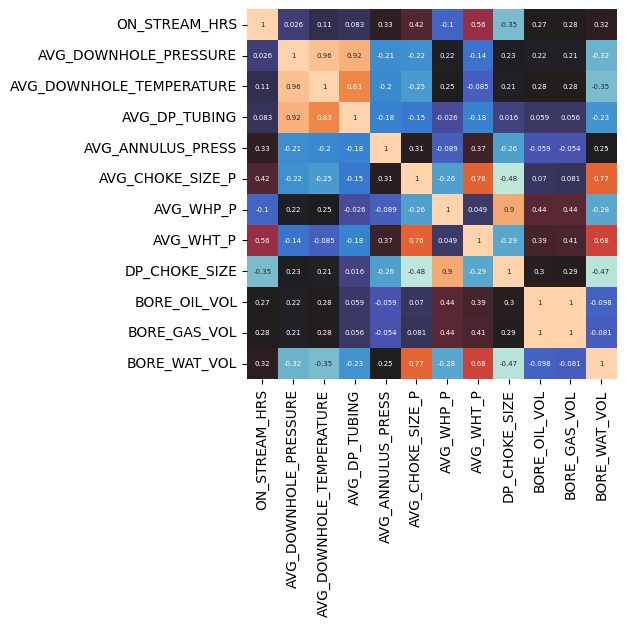

In [18]:
#Correlation between variables
wdc=welldataproducers.drop(labels=['DATEPRD', 
                        'WELL_BORE_CODE','WELL_BORE_CODE',
                        'BORE_WI_VOL',
                        'NPD_FIELD_CODE',
                        'NPD_WELL_BORE_CODE',
                         'NPD_WELL_BORE_NAME',
                         'NPD_FIELD_NAME',
                         'NPD_FACILITY_CODE',
                         'NPD_FACILITY_NAME',
                        'AVG_CHOKE_UOM',
                        'FLOW_KIND',
                        'WELL_TYPE'], axis=1)

sns.heatmap(wdc.corr(),annot=True,annot_kws={"size": 5},square=True,cmap='icefire',cbar=False)

# Lower triangle pairplot for data dropping

wdpp=welldataproducers.drop(labels=['DATEPRD', 
                        'WELL_BORE_CODE','WELL_BORE_CODE',
                        'BORE_WI_VOL',
                        'NPD_FIELD_CODE',
                         'NPD_WELL_BORE_NAME',
                         'NPD_FIELD_NAME',
                         'NPD_FACILITY_CODE',
                         'NPD_FACILITY_NAME',
                        'AVG_CHOKE_UOM',
                        'FLOW_KIND',
                        'WELL_TYPE'], axis=1)

sns.pairplot(wdpp, hue='NPD_WELL_BORE_CODE', 
             vars=['ON_STREAM_HRS', 'AVG_DOWNHOLE_PRESSURE',
                   'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING',
                   'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P',
                   'AVG_WHP_P', 'AVG_WHT_P',
                   'DP_CHOKE_SIZE', 'BORE_OIL_VOL',
                   'BORE_GAS_VOL', 'BORE_WAT_VOL'],
                   diag_kind="hist", kind="reg", corner=True)
plt.show()

In [19]:
##Selecting the variables
#ON_STREAM_HRS, AVG_DOWNHOLE_PRESSURE, AVG_ANNULUS_PRESS, AVG_CHOKE_SIZE_P, AVG_WHP_P, AVG_WHT_P, BORE_WAT_VOL
#BORE_OIL_VOL

In [20]:
#Setting up inputs and outputs
X = welldataproducers.filter(['ON_STREAM_HRS', 
                              'AVG_DOWNHOLE_PRESSURE',
                              'AVG_ANNULUS_PRESS', 
                              'AVG_CHOKE_SIZE_P',
                              'AVG_WHP_P', 
                              'AVG_WHT_P',
                             'BORE_WAT_VOL'])
Y = welldataproducers[['BORE_OIL_VOL']]
print('Features shape:', X.shape)
print('Target shape', Y.shape)

Features shape: (9342, 7)
Target shape (9342, 1)


In [21]:
#Selecting training and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42, shuffle = True)


Time=welldataproducers.iloc[:,0]
Time_train, Time_test = train_test_split(Time, test_size=0.3, random_state=42)

In [22]:
#Random Forest for features

from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

rf = RandomForestRegressor(random_state=0).fit(X_train, y_train.values.ravel()) 
predictions_rf = rf.predict(X_test)

print('Model score:',              round(rf.score(X_test, y_test),2))
print('Mean absolute error:',      round(mean_absolute_error(y_test, predictions_rf),2))
print('Root mean squared error:',  round(sqrt(mean_squared_error(y_test, predictions_rf)),2))
print('R2:',                       round(r2_score(y_test, predictions_rf),2))

Model score: 0.99
Mean absolute error: 59.76
Root mean squared error: 159.06
R2: 0.99


In [23]:
#Importance analysis for each input variable

featureslist = list(X_train.columns)

#Gini importance
importances = list(rf.feature_importances_)
featimps = [(feature, round(importance, 2)) for feature, importance in zip(featureslist, importances)]
featimps = sorted(featimps, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:30} Importance: {}'.format(*pair)) for pair in featimps];

Variable: AVG_WHP_P                      Importance: 0.37
Variable: AVG_WHT_P                      Importance: 0.37
Variable: BORE_WAT_VOL                   Importance: 0.12
Variable: AVG_CHOKE_SIZE_P               Importance: 0.06
Variable: AVG_DOWNHOLE_PRESSURE          Importance: 0.04
Variable: ON_STREAM_HRS                  Importance: 0.02
Variable: AVG_ANNULUS_PRESS              Importance: 0.02


In [24]:
#Cumulative importances

sortedimps = [importance[1] for importance in featimps]
sortedfeats = [importance[0] for importance in featimps]
cumimps = np.cumsum(sortedimps)
cumx = list(range(len(importances)))

Number of features for 90% importance: 4


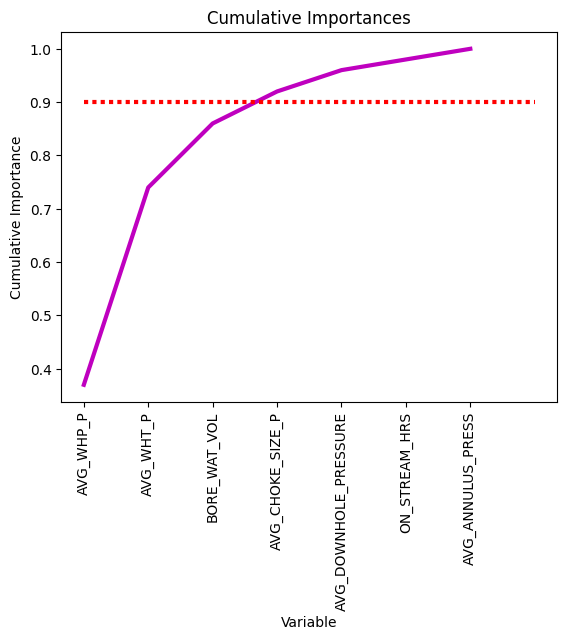

In [25]:
#Plotting cumulative importances

import matplotlib.pyplot as plt

plt.plot(cumx,cumimps, linewidth=3, color='m')
plt.xticks(cumx, sortedfeats, rotation = 'vertical')
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance'); plt.title('Cumulative Importances');
plt.hlines(y = 0.9, xmin=0, xmax=len(sortedimps), color = 'r', linestyles = (0,(1,1)), linewidth=3)
print('Number of features for 90% importance:', np.where(cumimps > 0.90)[0][0] + 1)


In [26]:
!pip list

Package                   Version
------------------------- ------------
absl-py                   2.0.0
aiohttp                   3.9.1
aiosignal                 1.3.1
alembic                   1.12.1
annotated-types           0.6.0
anyio                     3.7.1
argon2-cffi               21.3.0
argon2-cffi-bindings      21.2.0
asttokens                 2.0.5
async-timeout             4.0.3
attrs                     23.1.0
backcall                  0.2.0
beautifulsoup4            4.12.2
bleach                    4.1.0
cachetools                5.3.2
certifi                   2023.11.17
cffi                      1.16.0
charset-normalizer        3.3.2
colorama                  0.4.6
colorlog                  6.7.0
comm                      0.1.2
contourpy                 1.2.0
cycler                    0.12.1
debugpy                   1.6.7
decorator                 5.1.1
defusedxml                0.7.1
entrypoints               0.4
exceptiongroup            1.0.4
executing            

In [27]:
import copy
from pathlib import Path
import warnings

import lightning.pytorch as pl
from lightning.pytorch.callbacks import EarlyStopping, LearningRateMonitor
from lightning.pytorch.loggers import TensorBoardLogger
import numpy as np
import pandas as pd
import torch

from pytorch_forecasting import Baseline, TemporalFusionTransformer, TimeSeriesDataSet
from pytorch_forecasting.data import GroupNormalizer
from pytorch_forecasting.metrics import MAE, SMAPE, PoissonLoss, QuantileLoss
from pytorch_forecasting.models.temporal_fusion_transformer.tuning import optimize_hyperparameters

C:\Users\betty\anaconda3\envs\Python10\lib\site-packages\pytorch_forecasting\models\base_model.py:30: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



In [28]:
tftwelldata = welldataproducers.filter(['DATEPRD',
                                        'NPD_WELL_BORE_CODE',
                                       'BORE_OIL_VOL'])

fig, ax = plt.subplots(1, 1, figsize = (23, 8))
sns.lineplot(x='DATEPRD', y='BORE_OIL_VOL', hue='NPD_WELL_BORE_CODE', data=(tftwelldata.groupby(['DATEPRD', 'NPD_WELL_BORE_CODE']).BORE_OIL_VOL.sum().to_frame()))
ax.set_title("Monthly Oil Production per Well")

In [29]:
#Well A = 5351
#Well B = 5599
#Well C = 7078

In [30]:
dfwella=tftwelldata.loc[tftwelldata['NPD_WELL_BORE_CODE']=='5351'].truncate(after=7859)
dfwellb=tftwelldata.loc[tftwelldata['NPD_WELL_BORE_CODE']=='5599']
dfwellc=tftwelldata.loc[tftwelldata['NPD_WELL_BORE_CODE']=='7078']

In [31]:
dfwella

DATEPRD NPD_WELL_BORE_CODE  BORE_OIL_VOL
4967  2008-02-12               5351          0.00
4968  2008-02-13               5351          0.00
4969  2008-02-14               5351          0.00
4970  2008-02-15               5351          0.00
4971  2008-02-16               5351          0.00
...          ...                ...           ...
7855  2016-04-03               5351        102.69
7856  2016-04-04               5351        102.82
7857  2016-04-05               5351        102.44
7858  2016-04-06               5351         76.60
7859  2016-04-07               5351         94.06

[2893 rows x 3 columns]

In [35]:
train = dfwella.reset_index()
train = (train.merge((train[['DATEPRD']].drop_duplicates(ignore_index=True).rename_axis('time_idx')).reset_index(), on = ['DATEPRD'])).drop(["DATEPRD", "index"], axis=1)

In [36]:
train

NPD_WELL_BORE_CODE  BORE_OIL_VOL  time_idx
0                  5351          0.00         0
1                  5351          0.00         1
2                  5351          0.00         2
3                  5351          0.00         3
4                  5351          0.00         4
...                 ...           ...       ...
2888               5351        102.69      2888
2889               5351        102.82      2889
2890               5351        102.44      2890
2891               5351         76.60      2891
2892               5351         94.06      2892

[2893 rows x 3 columns]

In [37]:
max_prediction_length = 365 # a whole year
min_encoder_length = 365
max_encoder_length = train.index.nunique()

# keep the validation set held-out
training_cutoff = train["time_idx"].max() - max_prediction_length # validation on 2020

In [40]:
# Create training set
training_dataset = TimeSeriesDataSet(
    train[lambda x: x.time_idx <= training_cutoff],
    time_idx="time_idx",
    target="BORE_OIL_VOL", # target variable
    group_ids=["NPD_WELL_BORE_CODE"], # static covariates
    max_encoder_length=max_encoder_length, # maximum size of lookup window
    min_encoder_length=max_encoder_length//2,  
    max_prediction_length=max_prediction_length, # maximum size of horizon window
    min_prediction_length=max_prediction_length,
    time_varying_known_reals=[
        "time_idx"],
    time_varying_unknown_categoricals=[],
    time_varying_unknown_reals=['BORE_OIL_VOL'],
    target_normalizer=GroupNormalizer(
        groups=["NPD_WELL_BORE_CODE"], transformation="softplus"
    ),  # use softplus transformation and normalize by group
    add_relative_time_idx=True,
    add_target_scales=True,
    add_encoder_length=True,
)

In [41]:
# create validation set (predict=True)
validation_dataset = TimeSeriesDataSet.from_dataset(
  training_dataset, # dataset from which to copy parameters (encoders, scalers, ...)
  train, # data from which new dataset will be generated
  predict=True, # predict the decoder length on the last entries in the time index
  stop_randomization=True,
)

In [42]:
# Create network from TimeSeriesDataSet
tft = TemporalFusionTransformer.from_dataset(
    training_dataset,
    learning_rate=0.03,
    hidden_size=16,
    attention_head_size=1,
    dropout=0.1,
    hidden_continuous_size=8,
    output_size=7,  # number of quantiles
    loss=QuantileLoss(),
    log_interval=10,  # logging every 10 batches
    reduce_on_plateau_patience=4,
)
print(f"Number of parameters in network: {tft.size()/1e3:.1f}k")

Number of parameters in network: 18.8k


C:\Users\betty\anaconda3\envs\Python10\lib\site-packages\lightning\pytorch\utilities\parsing.py:198: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
C:\Users\betty\anaconda3\envs\Python10\lib\site-packages\lightning\pytorch\utilities\parsing.py:198: Attribute 'logging_metrics' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['logging_metrics'])`.


In [44]:
# define callbacks
early_stop_callback = EarlyStopping(monitor="val_loss", min_delta=1e-4, patience=10, verbose=False, mode="min")
lr_logger = LearningRateMonitor()  # log the learning rate
logger = TensorBoardLogger("lightning")  # log results to a tensorboard

# create trainer
trainer = pl.Trainer(
    max_epochs=50,
    accelerator="cpu",
    devices=1,
    gradient_clip_val=0.1,
    limit_train_batches=30,  # run valiation every 30 batches
    log_every_n_steps=10,
    # fast_dev_run=True,  # comment in to check that networkor dataset has no serious bugs
    callbacks=[lr_logger, early_stop_callback],
    logger=logger,
)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


In [45]:
# create training and validation dataloaders
batch_size =  128
train_dataloader = training_dataset.to_dataloader(train=True, batch_size=batch_size, num_workers=8)
val_dataloader = validation_dataset.to_dataloader(train=False, batch_size=batch_size * 10, num_workers=8)

# fit network
trainer.fit(
    tft,
    train_dataloaders=train_dataloader,
    val_dataloaders=val_dataloader,
)

Missing logger folder: lightning\lightning_logs

   | Name                               | Type                            | Params
----------------------------------------------------------------------------------------
0  | loss                               | QuantileLoss                    | 0     
1  | logging_metrics                    | ModuleList                      | 0     
2  | input_embeddings                   | MultiEmbedding                  | 0     
3  | prescalers                         | ModuleDict                      | 96    
4  | static_variable_selection          | VariableSelectionNetwork        | 1.7 K 
5  | encoder_variable_selection         | VariableSelectionNetwork        | 1.8 K 
6  | decoder_variable_selection         | VariableSelectionNetwork        | 1.2 K 
7  | static_context_variable_selection  | GatedResidualNetwork            | 1.1 K 
8  | static_context_initial_hidden_lstm | GatedResidualNetwork            | 1.1 K 
9  | static_context_initial_cell

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

C:\Users\betty\anaconda3\envs\Python10\lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:436: Consider setting `persistent_workers=True` in 'val_dataloader' to speed up the dataloader worker initialization.


C:\Users\betty\anaconda3\envs\Python10\lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:436: Consider setting `persistent_workers=True` in 'train_dataloader' to speed up the dataloader worker initialization.


Epoch 0: 100%|██████████| 11/11 [06:33<00:00,  0.03it/s, v_num=0, train_loss_step=944.0]  
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 1: 100%|██████████| 11/11 [07:18<00:00,  0.03it/s, v_num=0, train_loss_step=350.0, val_loss=1.09e+3, train_loss_epoch=1.23e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 2: 100%|██████████| 11/11 [07:05<00:00,  0.03it/s, v_num=0, train_loss_step=136.0, val_loss=442.0, train_loss_epoch=650.0]    
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 3: 100%|██████████| 11/11 [17:26<00:00,  0.01it/s, v_num=0, train_loss_step=120.0, val_loss=102.0, train_loss_epoch=205.0]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 4: 100%|██████████| 11/11 [12:53<00:00,  0.01it/s, v_num=0, train_loss_step=118.0, val_loss=101.0, train_loss_epoch=133.0]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 5: 100%|██████████| 11/11 [06:56<00:00,  0.03it/s, v_num=0, train_loss_step=99.00, val_loss=140.0, train_loss_epoch=117.0]
Validation: |          | 0

In [46]:
# calculate baseline mean absolute error, i.e. predict next value as the last available value from the history
baseline_predictions = Baseline().predict(val_dataloader, return_y=True)
MAE()(baseline_predictions.output, baseline_predictions.y)

C:\Users\betty\anaconda3\envs\Python10\lib\site-packages\lightning\pytorch\utilities\parsing.py:198: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
C:\Users\betty\anaconda3\envs\Python10\lib\site-packages\lightning\pytorch\utilities\parsing.py:198: Attribute 'logging_metrics' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['logging_metrics'])`.
Missing logger folder: C:\Users\betty\Downloads\lightning_logs
C:\Users\betty\anaconda3\envs\Python10\lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:436: Consider setting `persistent_workers=True` in 'predict_dataloader' to speed up the dataloader worker initialization.


tensor(74.6194)

In [47]:
# load the best model according to the validation loss
# (given that we use early stopping, this is not necessarily the last epoch)
best_model_path = trainer.checkpoint_callback.best_model_path
best_tft = TemporalFusionTransformer.load_from_checkpoint(best_model_path)

C:\Users\betty\anaconda3\envs\Python10\lib\site-packages\lightning\pytorch\utilities\parsing.py:198: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
C:\Users\betty\anaconda3\envs\Python10\lib\site-packages\lightning\pytorch\utilities\parsing.py:198: Attribute 'logging_metrics' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['logging_metrics'])`.


In [48]:
best_tft

TemporalFusionTransformer(
  	"attention_head_size":               1
  	"categorical_groups":                {}
  	"causal_attention":                  True
  	"dropout":                           0.1
  	"embedding_labels":                  {}
  	"embedding_paddings":                []
  	"embedding_sizes":                   {}
  	"hidden_continuous_size":            8
  	"hidden_continuous_sizes":           {}
  	"hidden_size":                       16
  	"learning_rate":                     0.03
  	"log_gradient_flow":                 False
  	"log_interval":                      10
  	"log_val_interval":                  10
  	"logging_metrics":                   ModuleList(
  	  (0): SMAPE()
  	  (1): MAE()
  	  (2): RMSE()
  	  (3): MAPE()
  	)
  	"loss":                              QuantileLoss(quantiles=[0.02, 0.1, 0.25, 0.5, 0.75, 0.9, 0.98])
  	"lstm_layers":                       1
  	"max_encoder_length":                2893
  	"monotone_constaints":               {}
  	"op

In [49]:
# raw predictions are a dictionary from which all kind of information including quantiles can be extracted
raw_predictions = best_tft.predict(val_dataloader, mode="raw", return_x=True)

C:\Users\betty\anaconda3\envs\Python10\lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:436: Consider setting `persistent_workers=True` in 'predict_dataloader' to speed up the dataloader worker initialization.


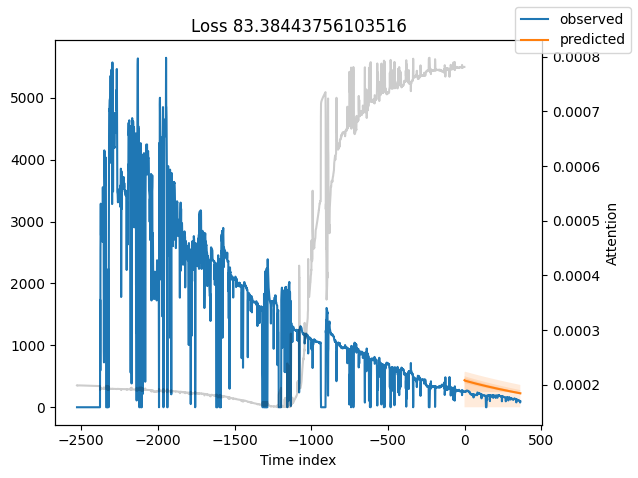

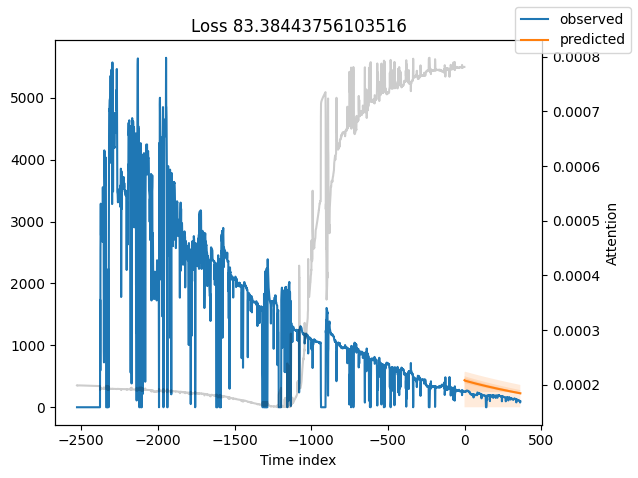

In [53]:
best_tft.plot_prediction(raw_predictions.x, raw_predictions.output, idx=0, add_loss_to_title=True)

In [54]:
# get prediction results as a dictionary
val_prediction_results = best_tft.predict(val_dataloader, mode="raw", return_x=True)

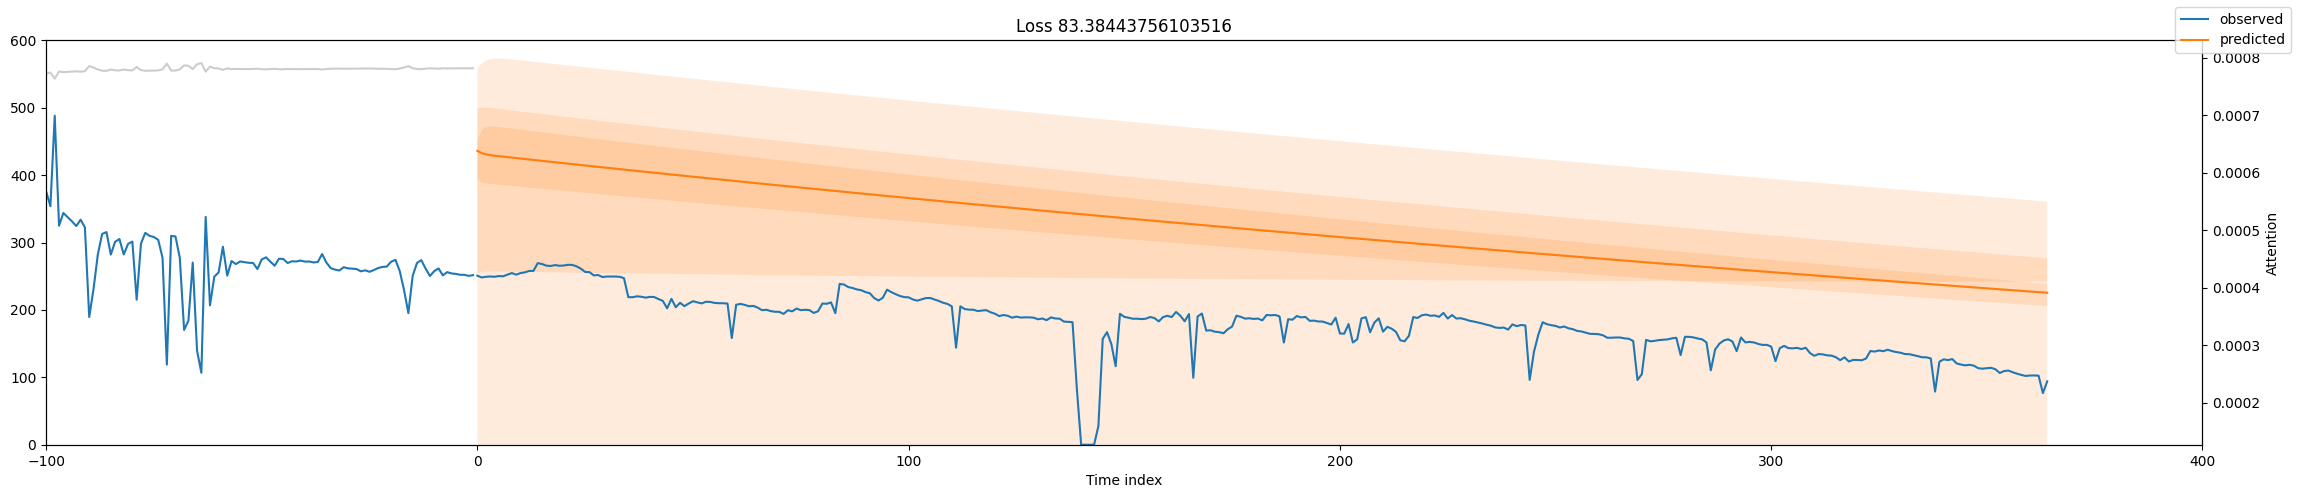

In [91]:
for idx in range(1):
    fig, ax = plt.subplots(figsize=(23,5))
    ax.set_xlim([-100, 400])
    ax.set_ylim([0, 600])
    best_tft.plot_prediction(val_prediction_results.x, # network input
                            val_prediction_results.output, # network output
                            idx=idx,
                            add_loss_to_title=True,
                            ax=ax);

In [61]:
# calcualte mean absolute error on validation set
predictions = best_tft.predict(val_dataloader, return_y=True, trainer_kwargs=dict(accelerator="cpu"))
MAE()(predictions.output, predictions.y)

tensor(143.4376)

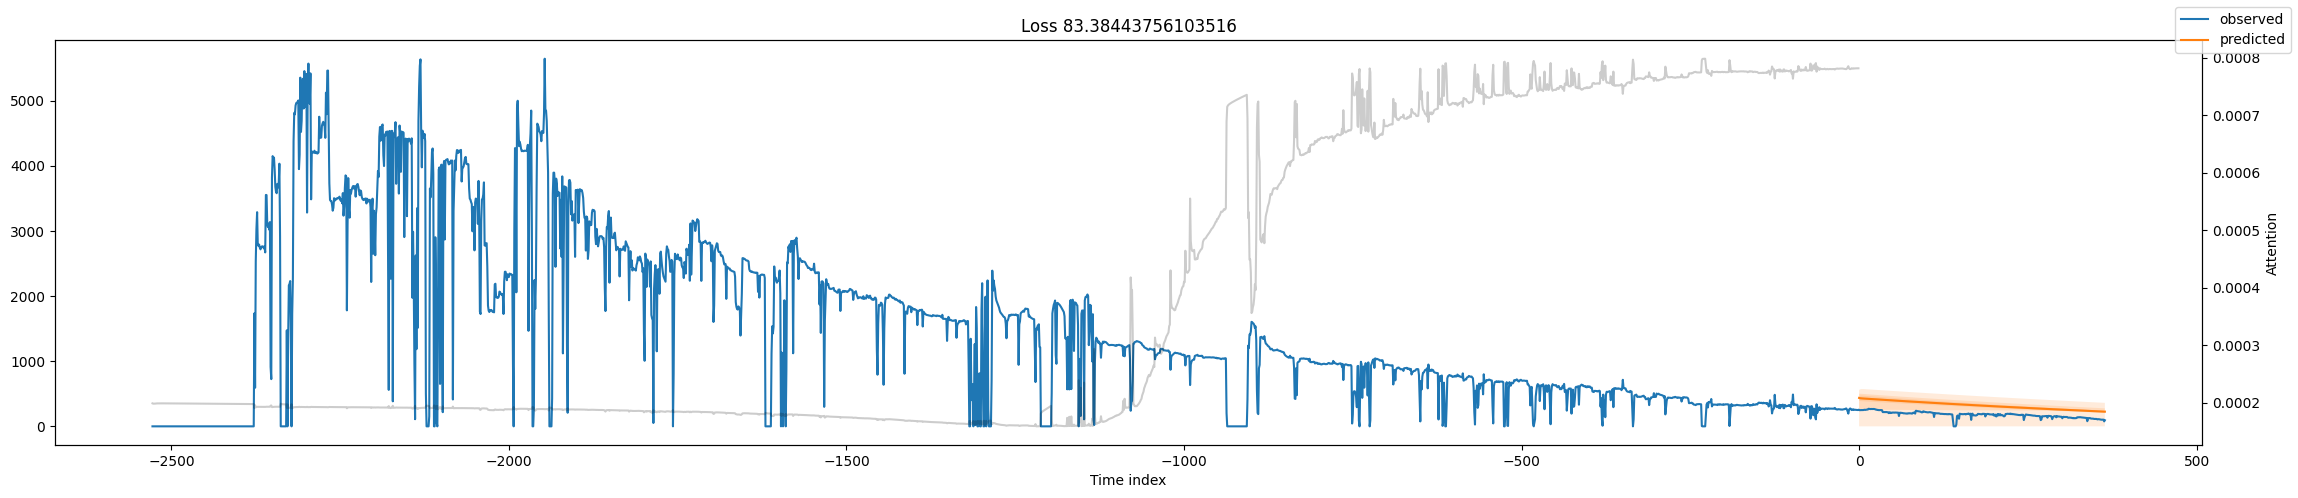

In [81]:
for idx in range(1):
    fig, ax = plt.subplots(figsize=(23,5))
    best_tft.plot_prediction(val_prediction_results.x, # network input
                            val_prediction_results.output, # network output
                            idx=idx,
                            add_loss_to_title=True,
                            ax=ax);